In [1]:
!pip install pycocotools

Install the Prerequisites

In [2]:
!pip install --upgrade scikit-image scipy

  Using cached scipy-1.15.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.6.0 requires dask==2023.3.2, but you have dask 2023.7.0 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.24.4 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.15.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
ydata-profiling 4.3.1 requires numpy<1.24,>=1.16.0, 

In [3]:
!pip uninstall -y numpy==1.23.5
!pip install "numpy>=1.16.5, <1.23.0"

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.4 which is incompatible.
cudf 23.6.1 requires protobuf<4.22,>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
cuml 23.6.0 requires dask==2023

In [4]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from random import shuffle
from PIL import Image

from pycocotools.coco import COCO

In [ ]:
dataDir='/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/'
dataType='val2014'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)
imageDir = '{}/images/{}/'.format(dataDir, dataType)

coco=COCO(annFile)

loading annotations into memory...
Done (t=5.46s)
creating index...
index created!


In [ ]:

ids = 1
cats = coco.loadCats(ids=ids)
print(cats)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}]


Also, you can print all the categories by the following code:

In [7]:
category_ids = coco.getCatIds()
num_categories = len(category_ids)
print('number of categories: ',num_categories)
for ids in category_ids:
    cats = coco.loadCats(ids=ids)
    print(cats)

number of categories:  80
[{'supercategory': 'person', 'id': 1, 'name': 'person'}]
[{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}]
[{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}]
[{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}]
[{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]
[{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}]
[{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}]
[{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}]
[{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}]
[{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}]
[{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}]
[{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}]
[{'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}]
[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
[{'supercategory': 'animal', 'id': 16, 'name': 'bird'}]
[{'supercategory': 'animal', 'id': 17, 'name': 'cat'}]
[{'supercategory': 'animal',

In [ ]:

image_ids = coco.getImgIds()
image_id = image_ids[0] 
image_info = coco.loadImgs(image_id)
print(image_info)

[{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://mscoco.org/images/391895', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}]


In [ ]:

annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)
print(annotations)

[{'segmentation': [[376.97, 176.91, 398.81, 176.91, 396.38, 147.78, 447.35, 146.17, 448.16, 172.05, 448.16, 178.53, 464.34, 186.62, 464.34, 192.28, 448.97, 195.51, 447.35, 235.96, 441.69, 258.62, 454.63, 268.32, 462.72, 276.41, 471.62, 290.98, 456.25, 298.26, 439.26, 292.59, 431.98, 308.77, 442.49, 313.63, 436.02, 316.86, 429.55, 322.53, 419.84, 354.89, 402.04, 359.74, 401.24, 312.82, 370.49, 303.92, 391.53, 299.87, 391.53, 280.46, 385.06, 278.84, 381.01, 278.84, 359.17, 269.13, 373.73, 261.85, 374.54, 256.19, 378.58, 231.11, 383.44, 205.22, 385.87, 192.28, 373.73, 184.19]], 'area': 12190.44565, 'iscrowd': 0, 'image_id': 391895, 'bbox': [359.17, 146.17, 112.45, 213.57], 'category_id': 4, 'id': 151091}, {'segmentation': [[352.55, 146.82, 353.61, 137.66, 356.07, 112.66, 357.13, 94.7, 357.13, 84.49, 363.12, 73.92, 370.16, 68.64, 370.16, 66.53, 368.4, 63.71, 368.05, 54.56, 361.0, 53.85, 356.07, 50.33, 356.43, 46.46, 364.17, 42.23, 369.1, 35.89, 371.22, 30.96, 376.85, 26.39, 383.54, 22.16, 

In [ ]:

filterClasses = ['laptop', 'tv', 'cell phone']
catIds = coco.getCatIds(catNms=filterClasses)
print(catIds)

[72, 73, 77]


In [ ]:
catID = 15
print(coco.loadCats(ids=catID))

imgId = coco.getImgIds(catIds=[catID])[0]
print(imgId)

[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
262148


In [12]:
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

[247584, 576412, 642663, 1209372, 1251030, 1272930, 1277823, 1303789, 1307874, 1312222, 1312550, 1321181, 1324108, 1331011, 1332687, 1371763, 1372845, 1422576, 1837952, 1962686, 2007683, 2061640, 900100262148]


Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted

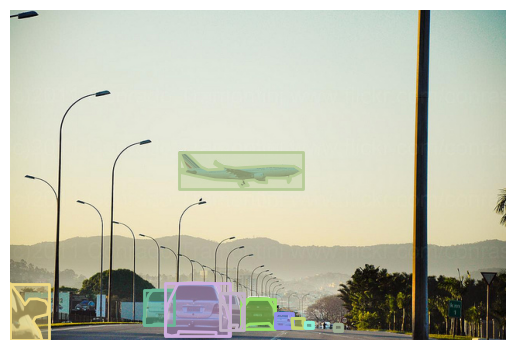

In [ ]:
def main():

    cat_ids = coco.getCatIds()
    print(f"Number of Unique Categories: {len(cat_ids)}")
    print("Category IDs:")
    print(cat_ids)

    
    cats = coco.loadCats(cat_ids)
    cat_names = [cat["name"] for cat in cats]
    print("Categories Names:")
    print(cat_names)


    query_id = cat_ids[0]
    query_annotation = coco.loadCats([query_id])[0]
    query_name = query_annotation["name"]
    query_supercategory = query_annotation["supercategory"]
    print("Category ID -> Category Name:")
    print(
        f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
    )


    query_name = cat_names[2]
    query_id = coco.getCatIds(catNms=[query_name])[0]
    print("Category Name -> ID:")
    print(f"Category Name: {query_name}, Category ID: {query_id}")


    img_ids = coco.getImgIds(catIds=[query_id])
    print(f"Number of Images Containing {query_name}: {len(img_ids)}")

    img_id = img_ids[2]
    img_info = coco.loadImgs([img_id])[0]
    img_file_name = img_info["file_name"]
    img_url = img_info["coco_url"]
    print(
        f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
    )

    
    ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    print(f"Annotations for Image ID {img_id}:")
    print(anns)

    im = plt.imread(imageDir+ coco.loadImgs(img_id)[0]['file_name'])
    plt.axis("off")
    plt.imshow(np.asarray(im))
    plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
    coco.showAnns(anns, draw_bbox=True)
    plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)
    plt.show()
    return


if __name__ == "__main__":

    main()

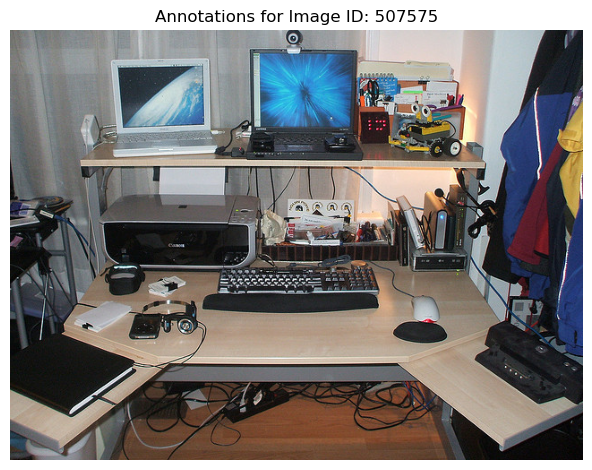

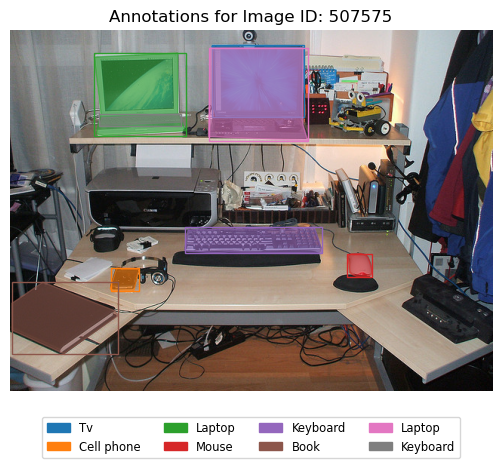

In [ ]:
filterClasses = ['laptop', 'tv', 'cell phone']

catIds = coco.getCatIds(catNms=filterClasses)

imgIds = coco.getImgIds(catIds=catIds)

if len(imgIds) > 0:
    image_id = imgIds[np.random.randint(len(imgIds))] 
    image_info = coco.loadImgs(image_id)

    if image_info is not None and len(image_info) > 0:
        image_info = image_info[0]
        image_path = imageDir + image_info['file_name']


        annotation_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(annotation_ids)


        category_names = [coco.loadCats(ann['category_id'])[0]['name'].capitalize() for ann in annotations]
        category_colors = list(matplotlib.colors.TABLEAU_COLORS.values())

        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('Img.png',dpi=350)
        plt.show()
        
        plt.imshow(image)
        plt.axis('off')

        for ann, color in zip(annotations, category_colors):
            bbox = ann['bbox']
            segmentation = ann['segmentation']

            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1,
                                     edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)

            for seg in segmentation:
                poly = np.array(seg).reshape((len(seg) // 2, 2))
                plt.fill(poly[:, 0], poly[:, 1], color=color, alpha=0.6)

        legend_patches = [patches.Patch(color=color, label=name) for color, name in zip(category_colors, category_names)]
        plt.legend(handles=legend_patches, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.2), fontsize='small')

        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('annImg.png',dpi=350)
        plt.show()
    else:
        print("No image information found for the selected image ID.")
else:
    print("No images found for the desired classes.")

In [ ]:
image_ids = coco.getImgIds()
image_id = image_ids[0] 
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id))

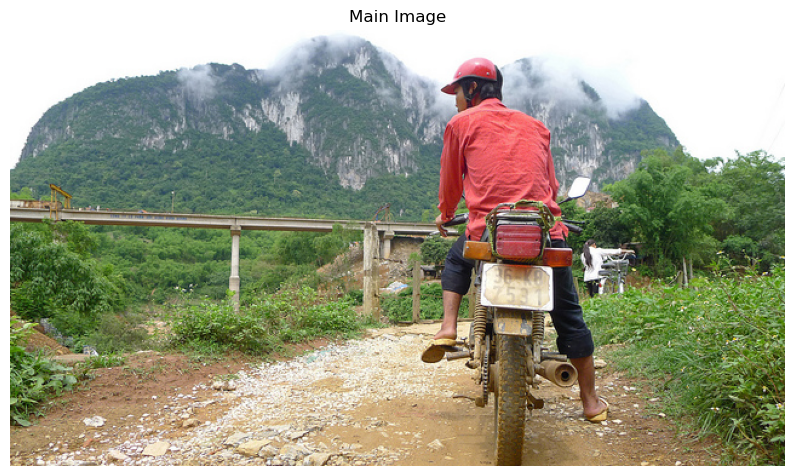

In [ ]:
image_info = coco.loadImgs(image_id)[0]
image_dir = os.path.join(dataDir, 'images', 'val2014')
image_path = os.path.join(image_dir, image_info['file_name'])

main_image = plt.imread(image_path)

plt.figure(figsize=(10, 10))
plt.imshow(main_image)
plt.axis('off')
plt.title('Main Image')

plt.savefig('main_image.png', dpi=300)

plt.show()


# Generating Binary Masks

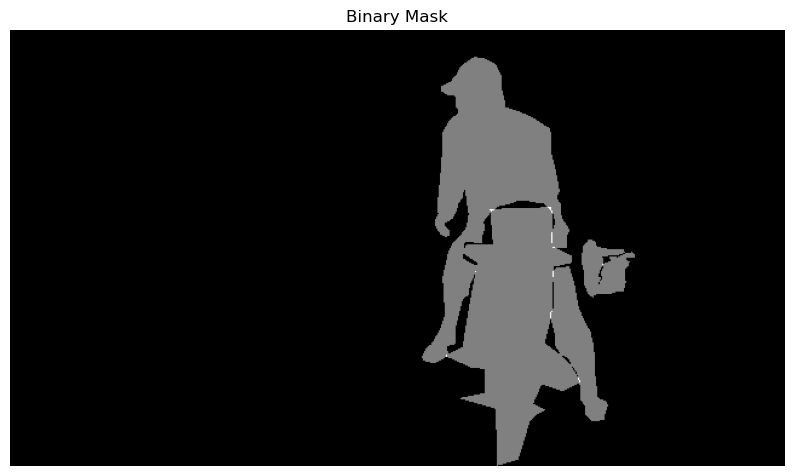

In [ ]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

binary_mask = np.zeros((height, width), dtype=np.uint8)

for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)

    binary_mask += mask

plt.figure(figsize=(10,10))
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')
plt.title('Binary Mask')
plt.savefig('binary_mask.png', dpi=300)
plt.show()


# Generating RGB Mask

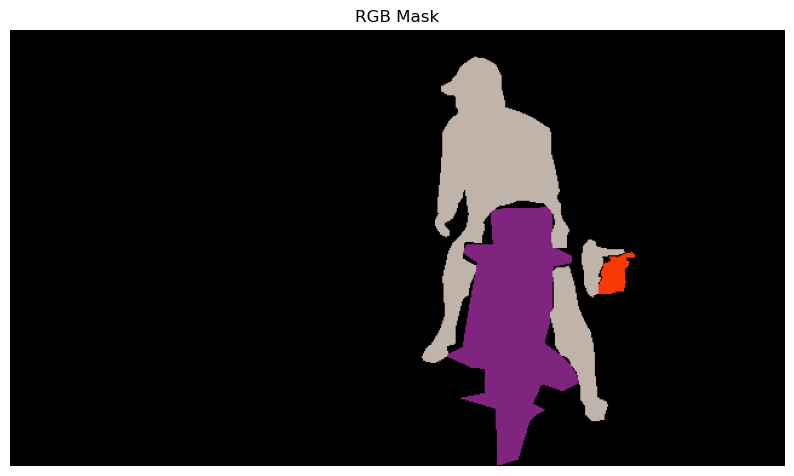

In [ ]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)

color_map = {cat['id']: (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
             for cat in coco.loadCats(catIDs)}

for annotation in annotations:
    category_id = annotation['category_id']
    color = color_map[category_id]

    mask = coco.annToMask(annotation)
    rgb_mask[mask == 1] = color

plt.figure(figsize=(10,10))
plt.imshow(rgb_mask)
plt.axis('off')
plt.title('RGB Mask')
plt.savefig('rgb_mask.png', dpi=300)
plt.show()


# Generating Instance Segmentation Mask

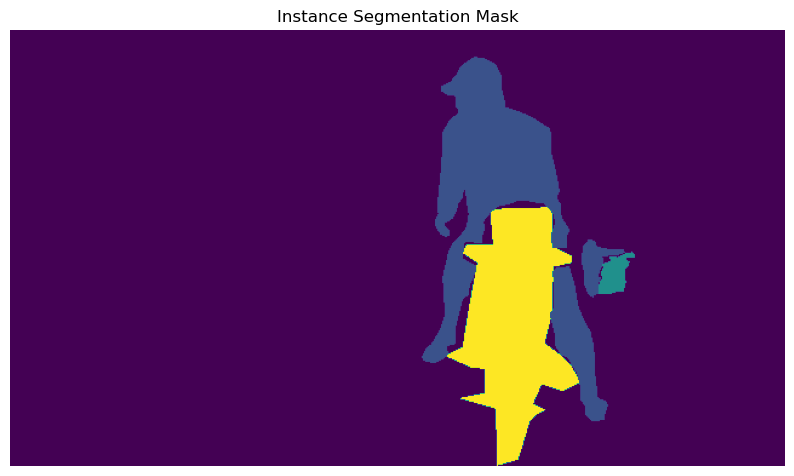

In [ ]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

instance_mask = np.zeros((height, width), dtype=np.uint8)

for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)
    category_id = annotation['category_id']

    instance_mask[mask == 1] = category_id

plt.figure(figsize=(10,10))
plt.imshow(instance_mask, cmap='viridis')
plt.axis('off')
plt.title('Instance Segmentation Mask')
plt.savefig('instance_mask.png', dpi=300)
plt.show()


# Generating Object Detection Bounding Boxes


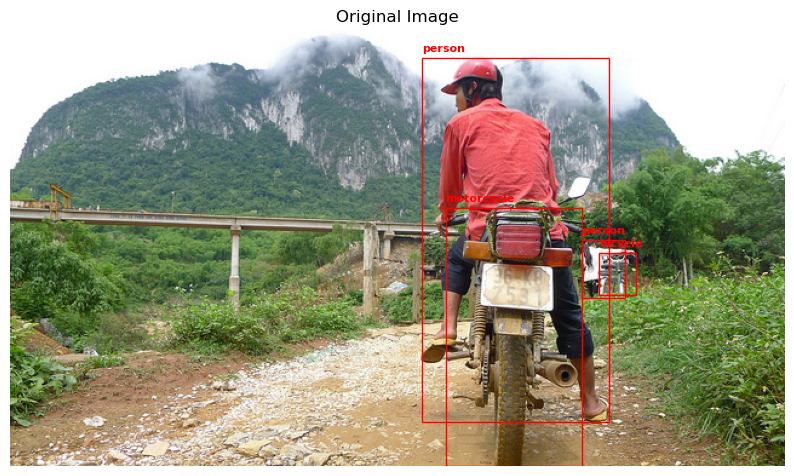

In [ ]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

fig, ax = plt.subplots(figsize=(10,10), dpi=100)

ax.imshow(main_image)
ax.axis('off')
ax.set_title('Original Image')

for annotation in annotations:
    bbox = annotation['bbox']
    category_id = annotation['category_id']
    category_name = coco.loadCats(category_id)[0]['name']

    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height

    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    ax.text(xmin, ymin - 5, category_name, fontsize=8, color='red', weight='bold')

plt.savefig('bounding_boxes.png', bbox_inches='tight')

plt.show()


# Post-Processing Techniques


/tmp/ipykernel_142/2231908562.py:3: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


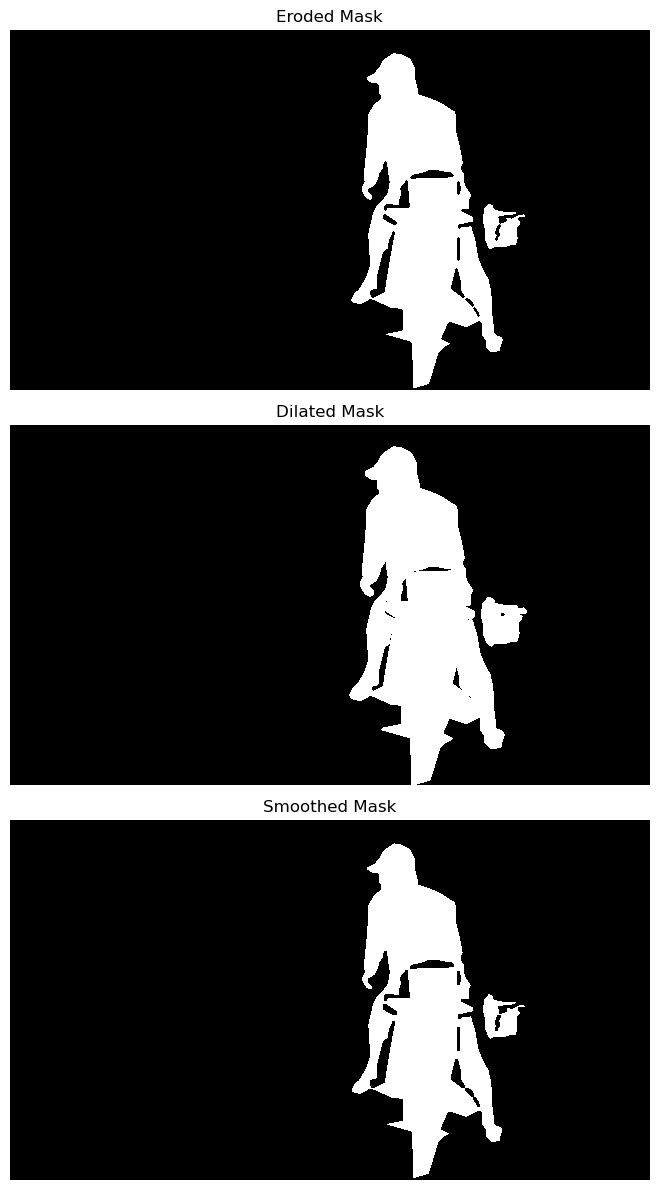

In [ ]:
import numpy as np
from scipy.ndimage import binary_erosion, binary_dilation
from scipy.ndimage.filters import gaussian_filter

eroded_mask = binary_erosion(binary_mask)

dilated_mask = binary_dilation(binary_mask)

smoothed_mask = gaussian_filter(binary_mask, sigma=.2)

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

axes[0].imshow(eroded_mask, cmap='gray')
axes[0].set_title('Eroded Mask')
axes[0].axis('off')

axes[1].imshow(dilated_mask, cmap='gray')
axes[1].set_title('Dilated Mask')
axes[1].axis('off')

axes[2].imshow(smoothed_mask, cmap='gray')
axes[2].set_title('Smoothed Mask')
axes[2].axis('off')

plt.tight_layout()
plt.savefig('post_processed_masks.png', dpi=300)
plt.show()


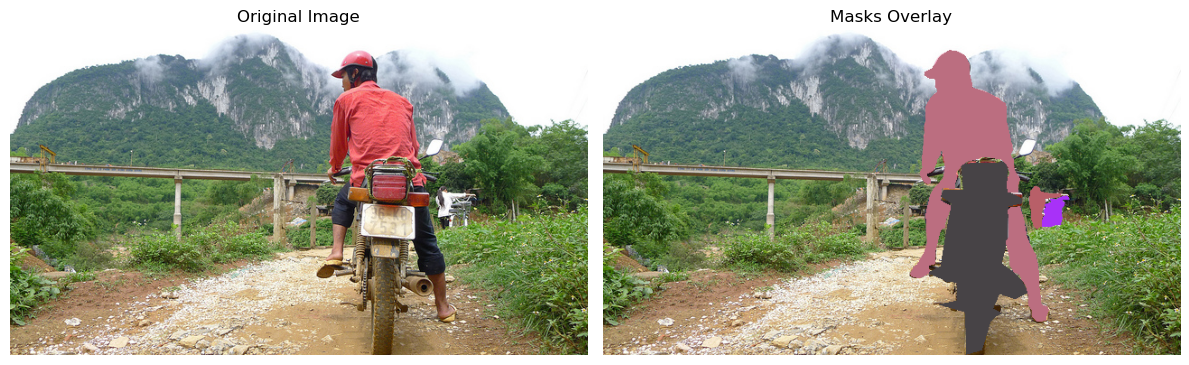

In [ ]:
image_id = image_ids[0]

image_info = coco.loadImgs(image_id)[0]
image_path = os.path.join(imageDir, image_info['file_name'])
image = plt.imread(image_path)

annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)

overlay = image.copy()

for annotation in annotations:
    mask = coco.annToMask(annotation)
    
    color = np.random.randint(0, 256, size=(3,), dtype=np.uint8)
    
    overlay[mask == 1] = color

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(overlay)
ax2.set_title('Masks Overlay')
ax2.axis('off')

plt.tight_layout()

plt.savefig('mask_visualization.png', dpi=300)

plt.show()


Upgrade the tensorflow-io to avoid errors.

In [25]:
!pip uninstall -y tensorflow-io
!pip install tensorflow-io

Found existing installation: tensorflow-io 0.31.0
Uninstalling tensorflow-io-0.31.0:
  Successfully uninstalled tensorflow-io-0.31.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 6.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 85.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
    Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0


In [ ]:
from tensorflow import keras


ANNOTATION_FILE_TRAIN = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/annotations/instances_train2014.json'
ANNOTATION_FILE_VAL = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/annotations/instances_val2014.json'

classes = ['person']

coco_train = COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=classes)
imgIds_train = coco_train.getImgIds(catIds=catIds_train)
imgDict_train = coco_train.loadImgs(imgIds_train)

coco_val = COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=classes)
imgIds_val = coco_val.getImgIds(catIds=catIds_val)
imgDict_val = coco_val.loadImgs(imgIds_val)

print(len(imgIds_train), len(catIds_train))
print(len(imgIds_val), len(catIds_val))

shuffle(imgIds_train)
shuffle(imgIds_val)

imgIds_val = imgIds_val[0:600]
imgIds_train = imgIds_train[0:6000]
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

print(len(train_images_person), len(val_images_person))

train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]

val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

len(os.listdir("/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/val2014"))

!mkdir mask_train_2014

count = 0 

for ID in imgIds_train:

    file_path = "/kaggle/working/mask_train_2014/COCO_train2014_{0:012d}.jpg".format(ID)

    sampleImgIds = coco_train.getImgIds(imgIds=[ID])
    sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
    anns = coco_train.loadAnns(annIds)

    mask = coco_train.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_train.annToMask(anns[i])

    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)
    count = count + 1

!mkdir mask_val_2014

count = 0

for ID in imgIds_val:

    file_path = "/kaggle/working/mask_val_2014/COCO_val2014_{0:012d}.jpg".format(ID)

    sampleImgIds = coco_val.getImgIds(imgIds=[ID])
    sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    annIds = coco_val.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_val, iscrowd=0)
    anns = coco_val.loadAnns(annIds)

    mask = coco_val.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_val.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)

    count = count + 1

    


class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        """
        CustomDataGenerator class for generating batches of preprocessed images and masks.

        Args:
            images_path (str): Path to the directory containing the original images.
            masks_path (str): Path to the directory containing the corresponding masks.
            batch_size (int): Number of samples in each batch.

        Attributes:
            images_path (str): Path to the directory containing the original images.
            masks_path (str): Path to the directory containing the corresponding masks.
            batch_size (int): Number of samples in each batch.
            image_filenames (list): List of matching filenames between images and masks.
            mask_filenames (list): List of matching filenames between masks and images.
        """
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        """
        Get the list of matching filenames between images and masks.

        Returns:
            list: List of matching filenames.
        """
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        """
        Get the number of batches in the generator.

        Returns:
            int: Number of batches.
        """
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        """
        Get a batch of preprocessed images and masks.

        Args:
            idx (int): Batch index.

        Returns:
            tuple: Batch of preprocessed images and masks.
        """
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)
        
        return np.array(batch_images), np.array(batch_masks)


images_path = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/train2014'
masks_path = '/kaggle/working/mask_train_2014'
batch_size = 8

train_generator = CustomDataGenerator(images_path, masks_path, batch_size)


loading annotations into memory...
Done (t=13.02s)
creating index...
index created!
loading annotations into memory...
Done (t=7.40s)
creating index...
index created!
45174 1
21634 1
6000 600


In [ ]:
def validate_image_shapes(generator):
    """
    Print the shapes of preprocessed images generated by the provided generator.

    Args:
        generator (CustomDataGenerator): Instance of the CustomDataGenerator class.
    """
    for i in range(len(generator)):
        batch_images, _ = generator[i]
        
        for image in batch_images:
            print(f"Shape of preprocessed image: {image.shape}")
            
validate_image_shapes(train_generator)


Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of pr

In [ ]:
print(len(os.listdir("/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/train2014")))

print(len(os.listdir("/kaggle/working/mask_train_2014")))

print(len(os.listdir("/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/val2014")))

print(len(os.listdir("/kaggle/working/mask_val_2014")))


82783
6000
40458
600


To test the generated masks and images, we can use the following code:



Mask Image Shape: (500, 335)
Main Image Shape: (500, 335, 3)


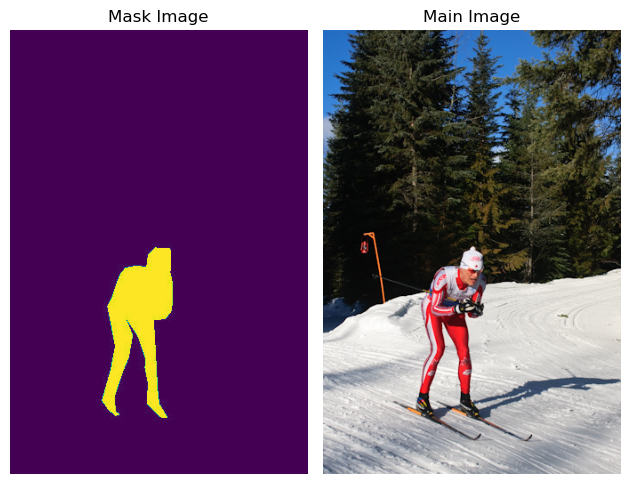

In [ ]:
mask_filenames = [filename for filename in os.listdir(masks_path) if filename.endswith('.jpg')]

first_mask_filename = mask_filenames[0]
image_filename = os.path.splitext(first_mask_filename)[0] + '.jpg'

mask_image = Image.open(os.path.join(masks_path, first_mask_filename))
plt.subplot(1, 2, 1)
plt.imshow(mask_image)
plt.title('Mask Image')
plt.axis('off')

main_image = Image.open(os.path.join(images_path, image_filename))
plt.subplot(1, 2, 2)
plt.imshow(main_image)
plt.title('Main Image')
plt.axis('off')

print('Mask Image Shape:', np.array(mask_image).shape)
print('Main Image Shape:', np.array(main_image).shape)

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
import keras
from keras.layers import *
from keras.optimizers import *

def down_block(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

    return conv, pool

def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv

def up_block(    
    input_tensor,
    no_filters,
    skip_connection, 
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor = (2,2),
    max_pool_window = (2,2),
    padding="same",
    kernel_initializer="he_normal"):
    
    
    conv = Conv2D(
        filters = no_filters,
        kernel_size= max_pool_window,
        strides = strides,
        activation = None,
        padding = padding,
        kernel_initializer=kernel_initializer
    )(UpSampling2D(size = upsampling_factor)(input_tensor))
    
    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv) 
    
    
    conv = concatenate( [skip_connection , conv]  , axis = -1)
    
    
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)
    
    return conv


def output_block(input_tensor,
    padding="same",
    kernel_initializer="he_normal"
):
    
    conv = Conv2D(
        filters=2,
        kernel_size=(3,3),
        strides=(1,1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    
    
    conv = Conv2D(
        filters=1,
        kernel_size=(1,1),
        strides=(1,1),
        activation="sigmoid",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    
    
    return conv
    

def UNet(input_shape = (128,128,3)):
    
    filter_size = [64,128,256,512,1024]
    
    inputs = Input(shape = input_shape)
    
    d1 , p1 = down_block(input_tensor= inputs,
                         no_filters=filter_size[0],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    d2 , p2 = down_block(input_tensor= p1,
                         no_filters=filter_size[1],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d3 , p3 = down_block(input_tensor= p2,
                         no_filters=filter_size[2],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d4 , p4 = down_block(input_tensor= p3,
                         no_filters=filter_size[3],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    b = bottle_neck(input_tensor= p4,
                         no_filters=filter_size[4],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal")
    
    
    
    u4 = up_block(input_tensor = b,
                  no_filters = filter_size[3],
                  skip_connection = d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    u3 = up_block(input_tensor = u4,
                  no_filters = filter_size[2],
                  skip_connection = d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u2 = up_block(input_tensor = u3,
                  no_filters = filter_size[1],
                  skip_connection = d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u1 = up_block(input_tensor = u2,
                  no_filters = filter_size[0],
                  skip_connection = d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    
    output = output_block(input_tensor=u1 , 
                         padding = "same",
                         kernel_initializer= "he_normal")
    
    model = keras.models.Model(inputs = inputs , outputs = output)
    
    
    return model
    
model = UNet(input_shape = (128,128,3))
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


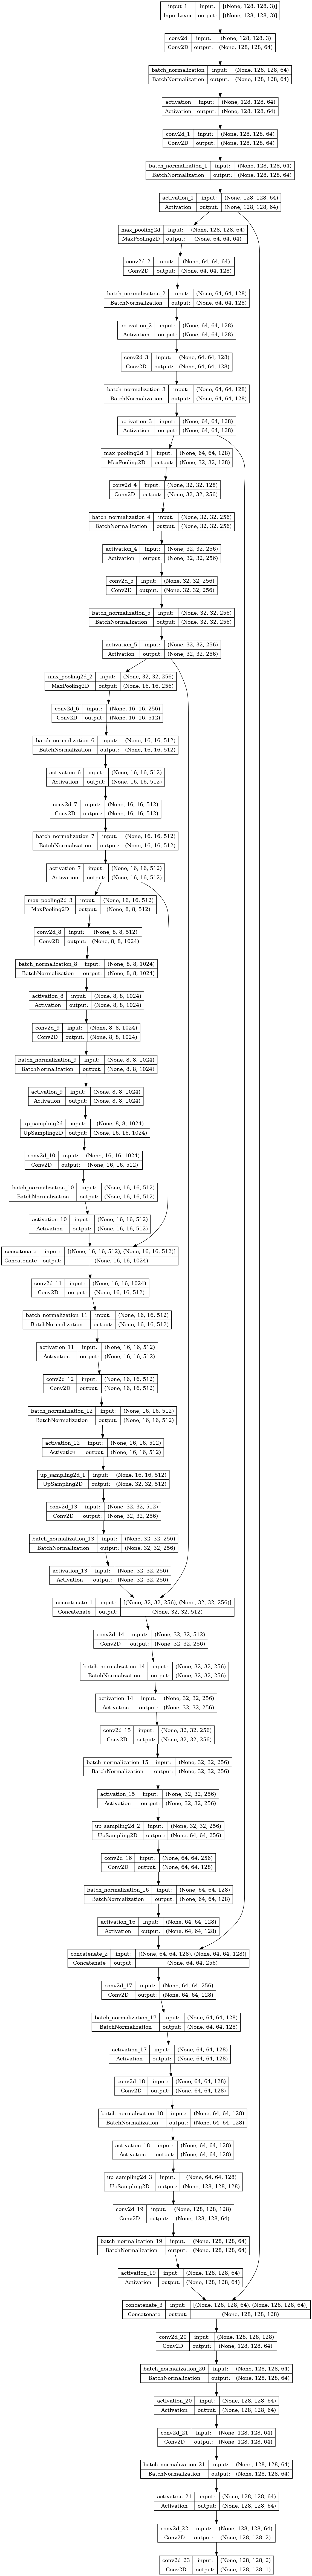

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='unet_model.png', show_shapes=True, show_layer_names=True)


In [32]:
images_path = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/val2014'
masks_path = '/kaggle/working/mask_val_2014'
batch_size = 8

val_generator = CustomDataGenerator(images_path, masks_path, batch_size)


In [ ]:
def print_preprocessed_image_shapes(model, generator):
    """
    Print the shapes of preprocessed images generated by the provided model and generator.

    Args:
        model (tf.keras.Model): The trained model.
        generator (CustomDataGenerator): Instance of the CustomDataGenerator class.
    """
    for i in range(len(generator)):
        batch_images, batch_mask = generator[i]

        for image in batch_images:
            print(f"Shape of preprocessed image: {image.shape}")
            
            
print_preprocessed_image_shapes(model, val_generator)





Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of pr

In [34]:
import sys

print("Python version:", sys.version)


Python version: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]


In [ ]:

train_steps =  len(os.listdir( "/kaggle/working/mask_train_2014/"))/batch_size
model.fit(train_generator,validation_data = val_generator, steps_per_epoch = train_steps , epochs=20)


Epoch 1/20
750/750 [==============================] - 88s 107ms/step - loss: 0.6826 - accuracy: 0.8044 - val_loss: 0.6681 - val_accuracy: 0.8264
Epoch 2/20
750/750 [==============================] - 75s 100ms/step - loss: 0.6522 - accuracy: 0.8368 - val_loss: 0.7035 - val_accuracy: 0.8085
Epoch 3/20
750/750 [==============================] - 75s 100ms/step - loss: 0.6237 - accuracy: 0.8481 - val_loss: 0.6119 - val_accuracy: 0.8496
Epoch 4/20
750/750 [==============================] - 75s 100ms/step - loss: 0.5971 - accuracy: 0.8553 - val_loss: 0.5872 - val_accuracy: 0.8557
Epoch 5/20
750/750 [==============================] - 75s 100ms/step - loss: 0.5714 - accuracy: 0.8621 - val_loss: 0.5629 - val_accuracy: 0.8619
Epoch 6/20
750/750 [==============================] - 75s 100ms/step - loss: 0.5466 - accuracy: 0.8675 - val_loss: 0.5383 - val_accuracy: 0.8667
Epoch 7/20
750/750 [==============================] - 75s 100ms/step - loss: 0.5219 - accuracy: 0.8737 - val_loss: 0.5181 - val_ac

1/1 [==============================] - 0s 405ms/step


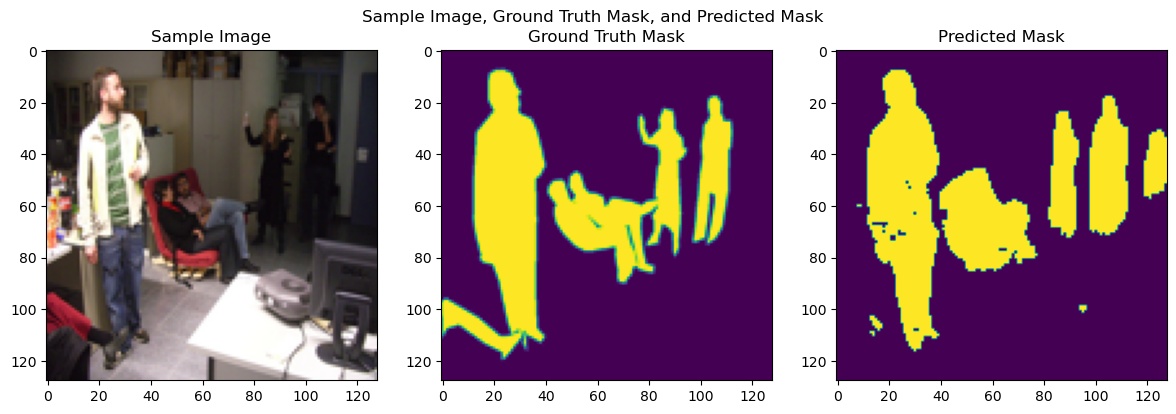

In [ ]:
sample_images, sample_masks = val_generator[0]

predictions = model.predict(sample_images)

threshold = 0.5 
thresholded_predictions = (predictions > threshold).astype(np.uint8)

idx = np.random.randint(0, sample_images.shape[0])

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(sample_images[idx])
axes[0].set_title('Sample Image')

axes[1].imshow(sample_masks[idx])
axes[1].set_title('Ground Truth Mask')

axes[2].imshow(thresholded_predictions[idx])
axes[2].set_title('Predicted Mask')

fig.suptitle('Sample Image, Ground Truth Mask, and Predicted Mask')

plt.tight_layout()

plt.show()


In [37]:
model.save('model.h5')